In [72]:
#2.1
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

In [73]:
#导入数据
data1 = pd.read_excel('./cumcm2018c1.xlsx')
data2 = pd.read_csv('./cumcm2018c2.csv', encoding='UTF-8')

In [74]:
#转化为日期格式数据
data1['csrq'] = pd.to_datetime(data1['csrq']) 
data1['djsj'] = pd.to_datetime(data1['djsj'])
data2['dtime'] = pd.to_datetime(data2['dtime'])

In [75]:
#重复值处理
data1['kh'] = data1['kh'].drop_duplicates()
print(data1['kh'].shape)

(194740,)


In [76]:
#缺失值处理
data1 = data1.dropna()
data2 = data2.dropna()
data1.isnull().sum()
data2.isnull().sum()

kh       0
dtime    0
spbm     0
sl       0
sj       0
je       0
spmc     0
jf       0
syjh     0
djh      0
gzbm     0
gzmc     0
dtype: int64

In [77]:
#异常值处理
data2.describe().astype(int)
data2 = data2.drop(data2[data2.sl < 0].index)
data2 = data2.drop(data2[data2.je < 0].index)
data2 = data2.drop(data2[data2.jf < 0].index)
print(data2.describe().astype(int))

           sl       sj       je      jf    syjh    gzbm
count  849697   849697   849697  849697  849697  849697
mean        1     1400     1375    1066     106    6313
std         1     3247     3238    2012      82    2373
min         1        0        0       0       1    1001
25%         1      330      324     190      41    4334
50%         1      695      690     520      97    8064
75%         1     1584     1550    1282     156    8123
max      1492  1342515  1342515  268503     320    9005


In [78]:
#年龄计算
now_year = dt.date.today().year-2
data1['age']=now_year-age.csrq.dt.year
#将年龄不符合常理的数据剔除
data1 = data1.drop(data1[data1.age > 100].index)
data1 = data1.drop(data1[data1.age < 15].index)
print(data1['age'].describe())

count    136277.000000
mean         41.506498
std          10.326457
min          15.000000
25%          33.000000
50%          41.000000
75%          49.000000
max         100.000000
Name: age, dtype: float64


In [79]:
#年龄分层
listBins = [15,35,60,100]
listLabels = ['青年人', '中年人', '老年人']
ap = data1[['age']]
for i in ap:
    data1['age_group'] = pd.cut(data1[i], bins=listBins, labels=listLabels, include_lowest=True)
print(data1['age_group'].value_counts())

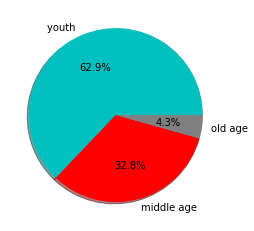

In [83]:
#构建年龄比例图
x = [85689, 44705, 5883]
labels =['youth ', 'middle age', 'old age']
plt.figure(figsize=(4, 4))
plt.pie(x,labels = labels, 
        autopct = '%3.1f%%',
        shadow = True,
        colors = ['c', 'r', 'gray'])
plt.savefig('./年龄对比.png')
plt.show()

In [90]:
data = pd.merge(data1,data2, on='kh')
sum = data['je'].groupby(data['age_group']).sum().astype(int).reset_index()
print(sum)

  age_group         je
0       青年人  115097625
1       中年人  439875728
2       老年人   15406618


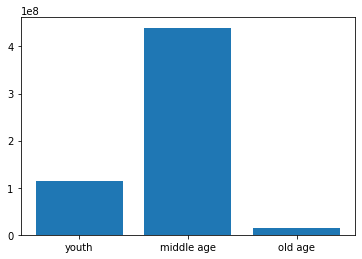

In [92]:
#构建年龄比例消费图
y_data = sum.je
x_data = ['youth', 'middle age', 'old age']
plt.bar(x_data, y_data)
plt.savefig('./年龄消费.png')
plt.show()

In [102]:
#性别人数计算
sex = data1.groupby('xb')['kh'].count().reset_index()
print(sex)

    xb      kh
0  0.0  106938
1  1.0   29339


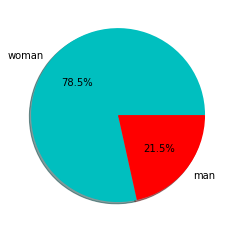

In [103]:
#构建性别比例图
x = [106938,29339]
labels =['woman', 'man']
plt.figure(figsize=(4, 4))
plt.pie(x,labels = labels, 
        autopct = '%3.1f%%',
        shadow = True,
        colors = ['c', 'r'])
plt.savefig('./性别对比.png')
plt.show()

In [104]:
#性别消费计算
sex_cus = data.groupby('xb')['je'].count().reset_index()
print(sex_cus)

    xb      je
0  0.0  358415
1  1.0   45624


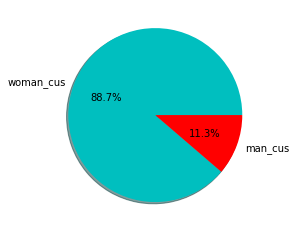

In [105]:
#构建性别消费比例图
x = [358415,45624]
labels =['woman_cus', 'man_cus']
plt.figure(figsize=(4, 4))
plt.pie(x,labels = labels, 
        autopct = '%3.1f%%',
        shadow = True,
        colors = ['c', 'r'])
plt.savefig('./性别消费占比.png')
plt.show()

In [114]:
#2.2统计会员与非会员订单数
yh = data['djh'].count()
b = data2['djh'].count()
nh = b - yh
print(yh,nh)

404039 445658


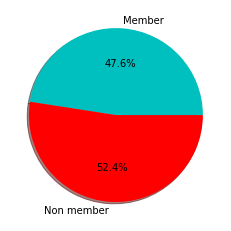

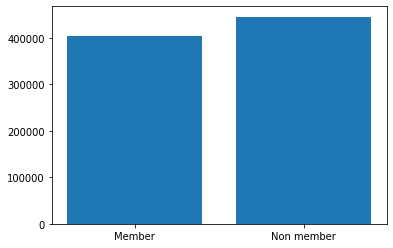

In [116]:
#构建会员订单数图例
x = [404039,445658]
labels =['Member', 'Non member']
plt.figure(figsize=(4, 4))
plt.pie(x,labels = labels, 
        autopct = '%3.1f%%',
        shadow = True,
        colors = ['c', 'r'])
plt.savefig('./会员订单数占比.png')
plt.show()

y_data = [yh, nh]
x_data = ['Member', 'Non member']
plt.bar(x_data, y_data)
plt.savefig('./会员订单数.png')
plt.show()

In [130]:
hy = data[['kh','sl','je']]
fhy = data2[['kh','sl','je']]

In [131]:
hy_cus = hy['je'].sum()
total_cus = fhy['je'].sum()
print(hy_cus,total_cus)

570379971.6499999 1169016739.3999999


In [132]:
fhy_cus = total_cus-hy_cus
print(hy_cus,fhy_cus)

570379971.6499999 598636767.75


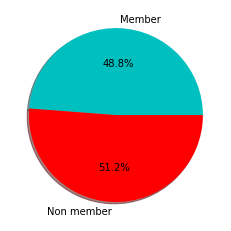

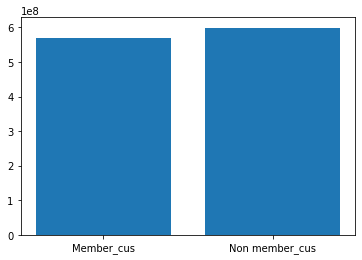

In [134]:
#构建会员消费总额图例
x = [570379971.6499999,598636767.75]
labels =['Member', 'Non member']
plt.figure(figsize=(4, 4))
plt.pie(x,labels = labels, 
        autopct = '%3.1f%%',
        shadow = True,
        colors = ['c', 'r'])
plt.savefig('./会员消费总额占比.png')
plt.show()

y_data = [hy_cus, fhy_cus]
x_data = ['Member_cus', 'Non member_cus']
plt.bar(x_data, y_data)
plt.savefig('./会员消费总额.png')
plt.show()

In [138]:
data['year'] = data.dtime.dt.year
data['month'] = data.dtime.dt.month

In [139]:
#年份消费统计
year_cus = data['je'].groupby(data['year'])
year_cus = year_cus.sum().reset_index()
year = []
year_total = []
for i in year_cus['year']:
    year.append(i)
for i in year_cus['je']:
    year_total.append(i)

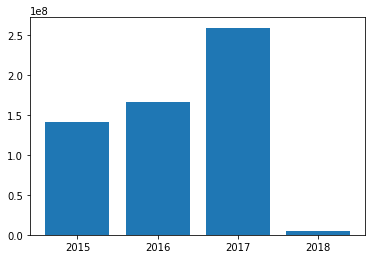

In [140]:
#绘制年度会员消费金额
y_data = year_total
x_data = ['2015', '2016', '2017', '2018']
plt.bar(x_data, y_data)   
plt.savefig('./年度会员消费金额.png')      
plt.show()

In [141]:
#不同年度各个月份消费金额统计
month_cus = data['je'].groupby([data['year'],data['month']])
month_cus = month_cus.sum().reset_index()

In [144]:
cus15 =  month_cus[['month', 'je']].iloc[0:9]
cus16 =  month_cus[['month', 'je']].iloc[9:20]
cus17 =  month_cus[['month', 'je']].iloc[20:32]
cus18 =  month_cus[['month', 'je']].iloc[32:33]

In [145]:
total_15 = []
month_15 = []
for i in cus15['je']:
    total_15.append(i)

total_16 = []
for i in cus16['je']:
    total_16.append(i)
    
total_17 = []
for i in cus17['je']:
    total_17.append(i)

total_18 = []
for i in cus18['je']:
    total_18.append(i)
    

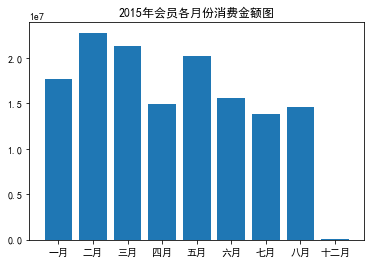

In [146]:
#绘制2015年会员各月份消费图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = total_15
x_data = ['一月', '二月', '三月', '四月', '五月', '六月', '七月','八月','十二月']
plt.title('2015年会员各月份消费金额图')
plt.bar(x_data, y_data)   
plt.savefig('./2015年会员各月份消费图.png')      
plt.show()

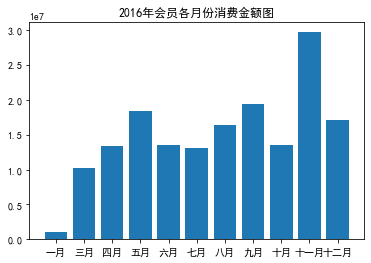

In [147]:
#绘制2016年会员各月份消费图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = total_16
x_data = ['一月', '三月', '四月', '五月', '六月', '七月','八月','九月','十月','十一月','十二月']
plt.title('2016年会员各月份消费金额图')
plt.bar(x_data, y_data)   
plt.savefig('./2016年会员各月份消费图.png')      
plt.show()

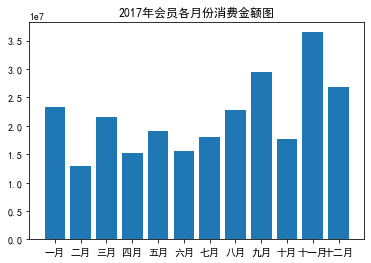

In [148]:
#绘制2017年会员各月份消费图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = total_17
x_data = ['一月','二月', '三月', '四月', '五月', '六月', '七月','八月','九月','十月','十一月','十二月']
plt.title('2017年会员各月份消费金额图')
plt.bar(x_data, y_data)   
plt.savefig('./2017年会员各月份消费图.png')      
plt.show()

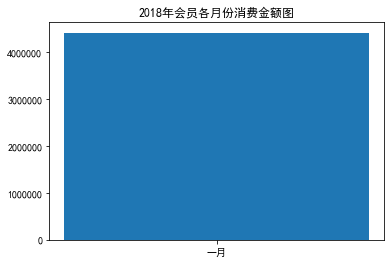

In [149]:
#绘制2018年会员各月份消费图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = total_18
x_data = ['一月']
plt.title('2018年会员各月份消费金额图')
plt.bar(x_data, y_data)   
plt.savefig('./2018年会员各月份消费图.png')      
plt.show()

In [150]:
#2.3
#时间段分层
data['hour'] = data.dtime.dt.hour
listBins = [0,6,11,13,18,24]
listLabels = ['凌晨', '早上', '中午', '下午', '晚上']
hg = data[['hour']]
for i in hg:
    data['hour_group'] = pd.cut(data[i], bins=listBins, labels=listLabels, include_lowest=True)

In [151]:
hourgp = data['kh'].groupby(data['hour_group'])
hourgp = hourgp.count().reset_index()
hgp = []
for i in hourgp['kh']:
    hgp.append(i)

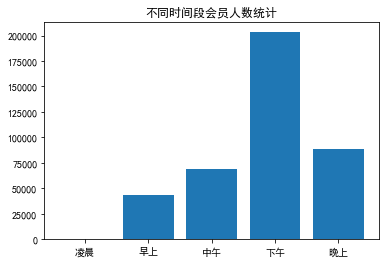

In [153]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = hgp
x_data = ['凌晨', '早上', '中午', '下午', '晚上']
plt.bar(x_data, y_data)  
plt.title('不同时间段会员人数统计')
plt.savefig('./不同时间段会员人数统计.png')      
plt.show()

In [155]:
#季节分层
data['month'] = data.dtime.dt.month
listBins = [1,3,6,9,12]
listLabels = ['冬季','春季','夏季','秋季']
mg = data[['month']]
for i in mg:
    data['month_group'] = pd.cut(data[i], bins=listBins, right=False, labels=listLabels, include_lowest=True, duplicates='drop')

data['year'] = data.dtime.dt.year
data['month_group'] = data['month_group'].fillna('month_group')

In [166]:
#季节消费人数统计
month_cus = data['kh'].groupby([data['year'],data['month_group']])
month_cus = month_cus.count().reset_index()

,month,je
20,1,2.338747e+07
21,2,1.294109e+07
22,3,2.163089e+07
23,4,1.527969e+07
24,5,1.912994e+07
25,6,1.564349e+07
26,7,1.801981e+07
27,8,2.278512e+07
28,9,2.941749e+07
29,10,1.770376e+07


In [167]:
cus15 =  month_cus[['kh', 'month_group']].iloc[0:3]
cus16 =  month_cus[['kh', 'month_group']].iloc[3:7]
cus17 =  month_cus[['kh', 'month_group']].iloc[7:11]
cus18 =  month_cus[['kh', 'month_group']].iloc[11:12]

In [168]:
cus_15 = []
for i in cus15['kh']:
    cus_15.append(i)

cus_16 = []
for i in cus16['kh']:
    cus_16.append(i)
    
cus_17 = []
for i in cus17['kh']:
    cus_17.append(i)

cus_18 = []
for i in cus18['kh']:
    cus_18.append(i)

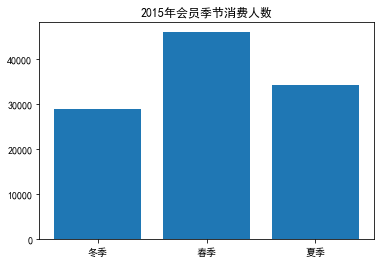

In [169]:
#2015年会员季节消费人数
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = cus_15
x_data = ['冬季', '春季', '夏季']
plt.title('2015年会员季节消费人数')
plt.bar(x_data, y_data)   
plt.savefig('./2015年会员季节消费人数.png')      
plt.show()

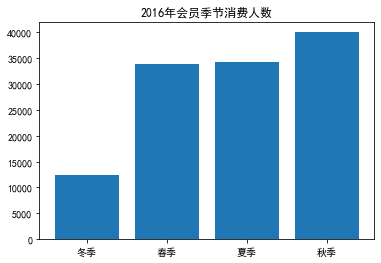

In [170]:
#2016年会员季节消费人数
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = cus_16
x_data = ['冬季', '春季', '夏季', '秋季']
plt.title('2016年会员季节消费人数')
plt.bar(x_data, y_data)   
plt.savefig('./2016年会员季节消费人数.png')      
plt.show()

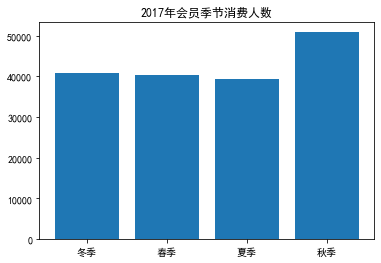

In [171]:
#2017年会员季节消费人数
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = cus_17
x_data = ['冬季', '春季', '夏季', '秋季']
plt.title('2017年会员季节消费人数')
plt.bar(x_data, y_data)   
plt.savefig('./2017年会员季节消费人数.png')      
plt.show()

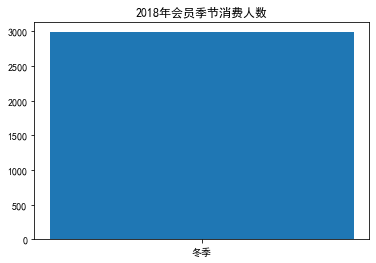

In [172]:
#2018年会员季节消费人数
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y_data = cus_18
x_data = ['冬季']
plt.title('2018年会员季节消费人数')
plt.bar(x_data, y_data)   
plt.savefig('./2018年会员季节消费人数.png')      
plt.show()